In [ ]:
import requests
from urllib.parse import urlencode
import os

base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/OdH_N65L66Mj7g'

final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']

download_response = requests.get(download_url)

abs_lib = os.path.abspath('../')
path = abs_lib + '/data/raw'
try:  
    os.mkdir(path)  
except OSError as error:  
    pass

with open('../data/raw/filtered.tsv', 'wb') as f:  
    f.write(download_response.content)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../data/raw/filtered.tsv',sep='\t',index_col=0)

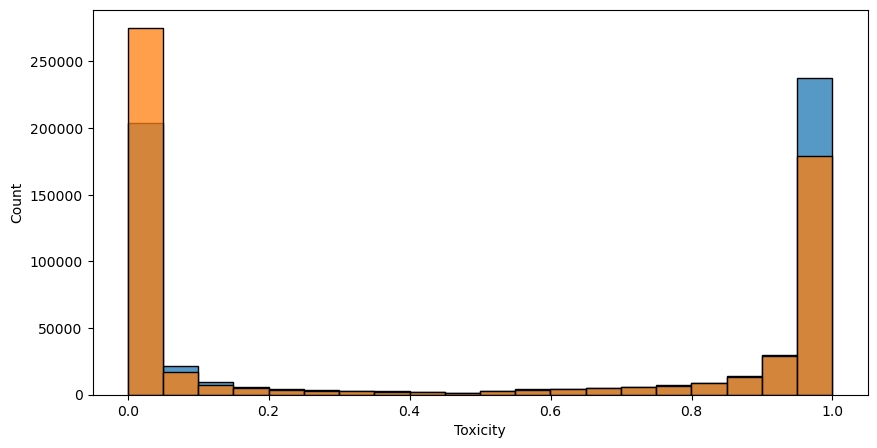

In [4]:
plt.figure(figsize=(10,5))
sns.histplot(df['ref_tox'],bins=20)
sns.histplot(df['trn_tox'],bins=20)
plt.xlabel("Toxicity")

plt.show()

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('../data/raw/dataset.csv',index_col=0)

for i, row in df.iterrows():
    if row['trn_tox'] > row['ref_tox']:
        df.at[i, 'trn_tox'] = row['ref_tox']
        df.at[i, 'ref_tox'] = row['trn_tox']
        df.at[i, 'reference'] = row['translation']
        df.at[i, 'translation'] = row['reference']

df['diff_tox'] = df['ref_tox'] - df['trn_tox']
df['ref_words']= df['reference'].str.split().apply(len)
df['trn_words']= df['translation'].str.split().apply(len)

df.drop(df[((df['ref_words'] > 127) | (df['trn_words'] > 127))].index,inplace=True)
df.to_csv('../data/interim/data.csv')

We can see that toxic and non toxic sentences are in both reference and translation columns. So,we can swap them to make dataset consistent and contain more data rather then throwing them away.

Further, swapped data will be used (toxic sentences will be all in reference column)

Toxicity levels of texts

In [ ]:
df = pd.read_csv('../data/interim/data.csv')

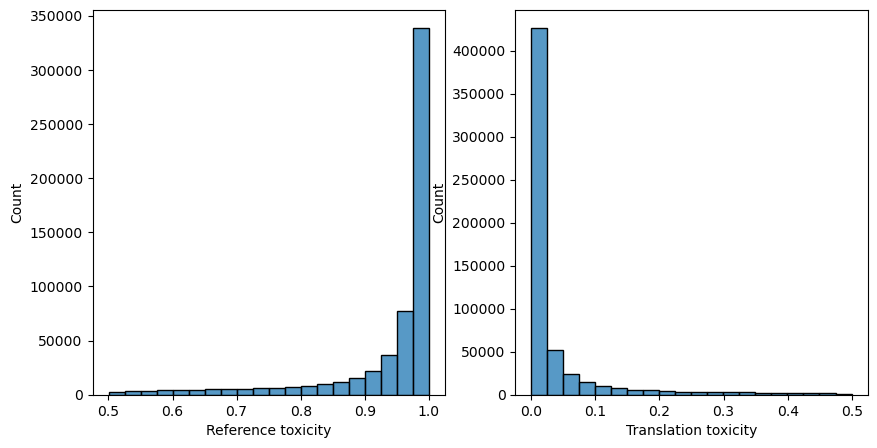

In [7]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df['ref_tox'],bins=20)
plt.xlabel("Reference toxicity")
plt.subplot(1,2,2)
sns.histplot(df['trn_tox'],bins=20)
plt.xlabel("Translation toxicity")

plt.show()

Number of words in texts

It is important since different models have different maximum length of the sequence

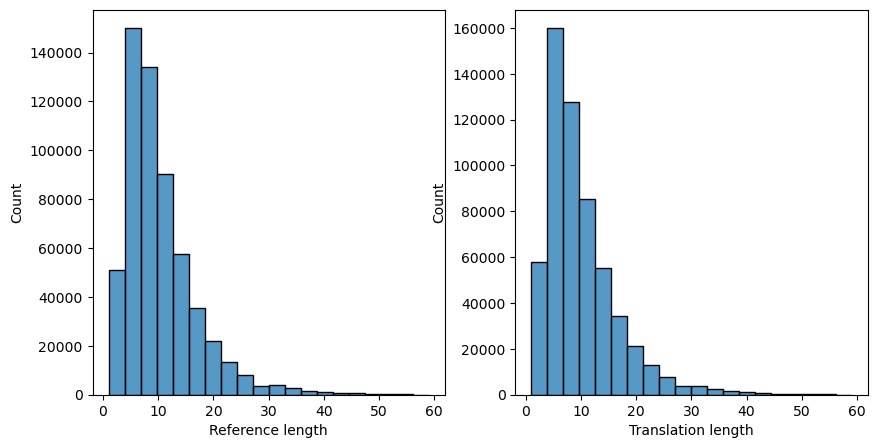

In [8]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df['ref_words'],bins=20)
plt.xlabel("Reference length")
plt.subplot(1,2,2)
sns.histplot(df['trn_words'],bins=20)
plt.xlabel("Translation length")

plt.show()

Difference in toxicity levels between reference and paraphrased ones

<Axes: xlabel='diff_tox', ylabel='Count'>

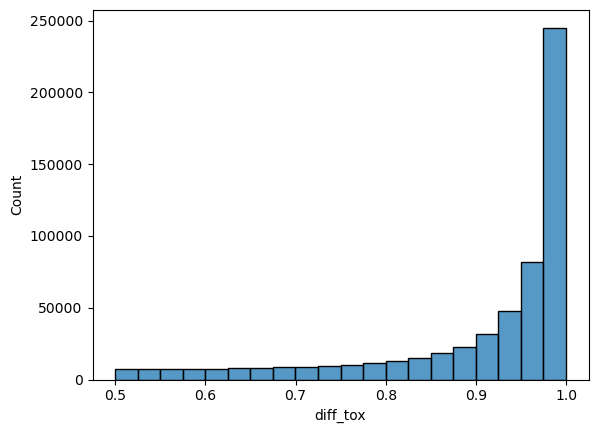

In [10]:
sns.histplot(df['diff_tox'],bins=20)

Cosine similarities of text pairs. We can see that they all are above 60%.

<Axes: xlabel='similarity', ylabel='Count'>

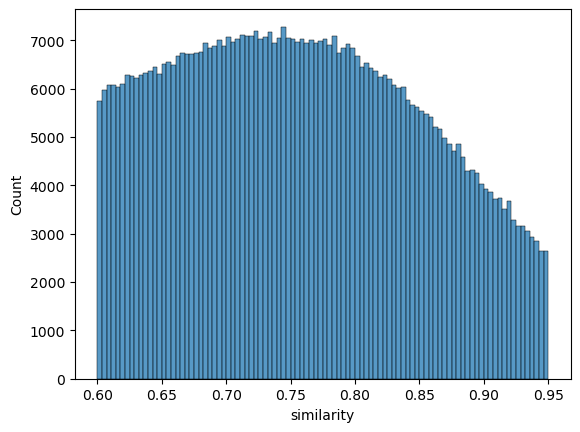

In [11]:
sns.histplot(df['similarity'])